In [20]:
import pandas as pd
import numpy as np

In [21]:
data2 = pd.read_csv('./data/data_2.csv',encoding='gbk')
data2.shape

(4455, 81)

In [22]:
from sklearn.model_selection import train_test_split
y = data2['status']
X = data2.drop(['status'],axis = 1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2018)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score

# 数据归一化
from sklearn.preprocessing import minmax_scale
X_train = minmax_scale(X_train)
X_test =  minmax_scale(X_test)

In [24]:
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [25]:
import warnings
warnings.filterwarnings("ignore")

LR = LogisticRegression()
LR.fit(X_train,y_train)

svc = SVC(kernel='linear',probability=True)
svc.fit(X_train,y_train)

DT = DecisionTreeClassifier(max_depth=6)
DT.fit(X_train,y_train)

RF = RandomForestClassifier()
RF.fit(X_train,y_train)

XGB = XGBClassifier()
XGB.fit(X_train,y_train)

models = [LR,svc,DT,RF,XGB]#

In [26]:
names = ["LR","SVC", 'DT', "RF","Xgb"]#
evaluates = ['accuracy','precision','recall','f1','auc']

In [27]:
df_list = []
for name,model in zip(names,models):
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    #accuracy
    train_accuracy = model.score(X_train,y_train)
    test_accuracy = model.score(X_test,y_test)
    #precision   
    train_precision = precision_score(y_train,y_train_pred)
    test_precision = precision_score(y_test,y_test_pred)   
    #recall
    train_recall = recall_score(y_train,y_train_pred)
    test_recall = recall_score(y_test,y_test_pred)   
    #f1
    train_f1 = f1_score(y_train,y_train_pred)
    test_f1 = f1_score(y_test,y_test_pred)   
    #auc 计算时，计算的应该是不同的概率画出来的曲线下的面积,而不是预测值对应的曲线下的面积
    #预测值 分类模型，应该全是0 或者 1 ，但是概率是类似于得分一样的值
    #根据资料貌似两种都行，都可以作为阈值来进行ROC曲线的绘制
    y_train_pred = model.predict_proba(X_train)[:,1]
    y_test_pred = model.predict_proba(X_test)[:,1]
    
    train_auc = roc_auc_score(y_train,y_train_pred)
    test_auc = roc_auc_score(y_test,y_test_pred)
    print('{}  训练集： accuracy:{:.3},precision:{:.3}, recall:{:.3}, f1:{:.3}, auc:{:.3}'.format(name,train_accuracy,train_precision,train_recall,train_f1,train_auc))
    print('{}  测试集： accuracy:{:.3},precision:{:.3}, recall:{:.3}, f1:{:.3}, auc:{:.3}'.format(name,test_accuracy,test_precision,test_recall,test_f1,test_auc))
    print('\n')
    df = pd.DataFrame(np.array([train_accuracy,train_precision,train_recall,train_f1,train_auc,test_accuracy,test_precision,test_recall,test_f1,test_auc]).reshape(2,-1),
                  index = ['train','test'],
                  columns = ['Accuracy','Precision','Recall','F1-Score','AUC-Score'])
    df_list.append(df)

pd.concat(df_list,axis=0,keys=names)

LR  训练集： accuracy:0.797,precision:0.757, recall:0.305, f1:0.435, auc:0.802
LR  测试集： accuracy:0.789,precision:0.576, recall:0.491, f1:0.53, auc:0.802


SVC  训练集： accuracy:0.788,precision:0.823, recall:0.216, f1:0.342, auc:0.807
SVC  测试集： accuracy:0.791,precision:0.63, recall:0.336, f1:0.439, auc:0.805


DT  训练集： accuracy:0.834,precision:0.743, recall:0.533, f1:0.621, auc:0.838
DT  测试集： accuracy:0.706,precision:0.424, recall:0.593, f1:0.494, auc:0.676


RF  训练集： accuracy:0.983,precision:0.997, recall:0.935, f1:0.965, auc:0.999
RF  测试集： accuracy:0.754,precision:0.491, recall:0.414, f1:0.449, auc:0.695


Xgb  训练集： accuracy:0.85,precision:0.865, recall:0.489, f1:0.625, auc:0.914
Xgb  测试集： accuracy:0.77,precision:0.522, recall:0.614, f1:0.565, auc:0.79




Accuracy  Precision    Recall  F1-Score  AUC-Score
LR  train  0.797306   0.757009  0.304893  0.434705   0.801683
    test   0.789080   0.576087  0.490741  0.530000   0.801921
SVC train  0.787684   0.822967  0.215809  0.341948   0.807256
    test   0.791324   0.630058  0.336420  0.438632   0.804910
DT  train  0.833547   0.743007  0.533250  0.620891   0.837867
    test   0.706058   0.423841  0.592593  0.494208   0.676205
RF  train  0.982681   0.997323  0.934755  0.965026   0.999426
    test   0.753927   0.490842  0.413580  0.448911   0.695150
Xgb train  0.849904   0.864745  0.489335  0.625000   0.913569
    test   0.770381   0.522310  0.614198  0.564539   0.789563

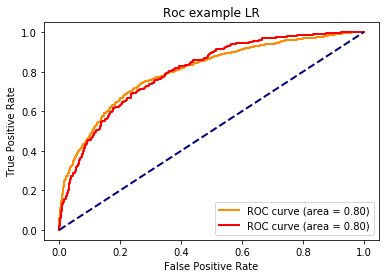

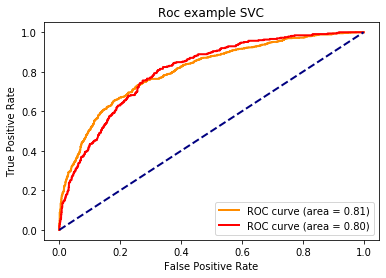

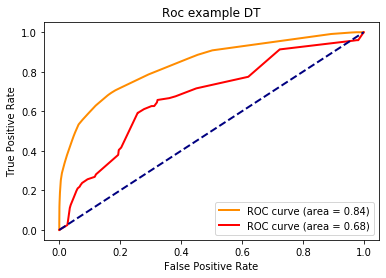

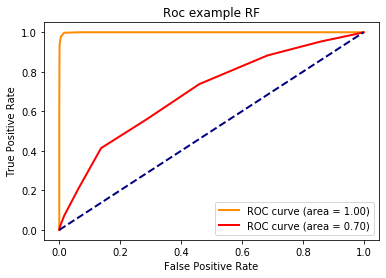

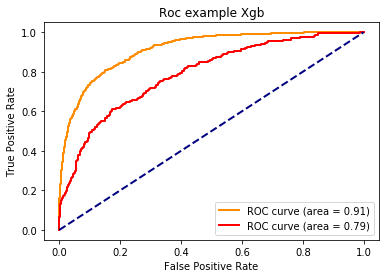

In [28]:
import matplotlib.pyplot as plt
def draw_roc_curve(train_pre_proba,test_pre_proba,train_auc,test_auc,model_name):
    fpr,tpr,roc_auc = train_pre_proba
    test_fpr,test_tpr,test_roc_auc = test_pre_proba
    
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % train_auc)
    plt.plot(test_fpr, test_tpr, color='red',
         lw=lw, label='ROC curve (area = %0.2f)' %test_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    #plt.xlim([0.0, 1.0])
    #plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Roc example '+ model_name)
    plt.legend(loc="lower right")
    plt.show()
for name,model in zip(names,models):
    
    y_train_pred = model.predict_proba(X_train)[:,1]
    y_test_pred = model.predict_proba(X_test)[:,1]


    train_roc = roc_curve(y_train,y_train_pred)
    test_roc = roc_curve(y_test,y_test_pred)

    train_auc = roc_auc_score(y_train,y_train_pred)
    test_auc = roc_auc_score(y_test,y_test_pred)
    

    draw_roc_curve(train_roc,test_roc,train_auc,test_auc,name)

In [29]:
from xgboost.sklearn import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score,roc_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
#模型评估
def model_metrics(clf, X_train, X_test, y_train, y_test):
    
    #predict是训练后返回预测结果，是标签值。
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    
    #predict_proba返回的是一个 n 行 k 列的数组， 第 i 行 第 j 列上的数值是模型预测 第 i 个预测样本为某个标签的概率，并且每一行的概率和为1
    y_train_proba = clf.predict_proba(X_train)[:,1]
    y_test_proba = clf.predict_proba(X_test)[:,1]
    
    # 准确率
    print('准确率-', end = ' ')
    print('训练集：', '%.4f'%accuracy_score(y_train, y_train_pred), end = ' ')
    print('测试集：', '%.4f'%accuracy_score(y_test, y_test_pred))
    
    # 精准率
    print('精准率-', end = ' ')
    print('训练集：', '%.4f'%precision_score(y_train, y_train_pred), end = ' ')
    print('测试集：', '%.4f'%precision_score(y_test, y_test_pred))

    # 召回率
    print('召回率-', end = ' ')
    print('训练集：', '%.4f'%recall_score(y_train, y_train_pred), end = ' ')
    print('测试集：', '%.4f'%recall_score(y_test, y_test_pred))
    
    # f1-score
    print('f1-score-', end = ' ')
    print('训练集：', '%.4f'%f1_score(y_train, y_train_pred), end = ' ')
    print('测试集：', '%.4f'%f1_score(y_test, y_test_pred))
    
    # auc取值：用roc_auc_score或auc
    print('auc', end = ' ')
    print('训练集：', '%.4f'%roc_auc_score(y_train, y_train_proba), end = ' ')
    print('测试集：', '%.4f'%roc_auc_score(y_test, y_test_proba))
    
    # roc曲线
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_proba, pos_label = 1)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_proba, pos_label = 1)
    
    label = ["Train - AUC:{:.4f}".format(auc(fpr_train, tpr_train)), 
             "Test - AUC:{:.4f}".format(auc(fpr_test, tpr_test))]
    plt.plot(fpr_train,tpr_train)
    plt.plot(fpr_test,tpr_test)
    plt.plot([0, 1], [0, 1], 'd--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(label, loc = 4)
    plt.title("ROC curve")

In [33]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

[准确率] 训练集： 0.7973 测试集： 0.7891
[精准率] 训练集： 0.7570 测试集： 0.5761
[召回率] 训练集： 0.3049 测试集： 0.4907
[f1-score] 训练集： 0.4347 测试集： 0.5300
[auc值] 训练集： 0.8017 测试集： 0.8019


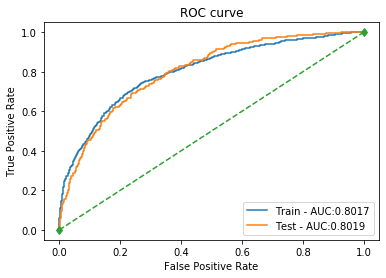

In [34]:
#LR
model_metrics(lr, X_train, X_test, y_train, y_test)

In [35]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 4)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

[准确率] 训练集： 0.7915 测试集： 0.7651
[精准率] 训练集： 0.6861 测试集： 0.5169
[召回率] 训练集： 0.3400 测试集： 0.4722
[f1-score] 训练集： 0.4547 测试集： 0.4935
[auc值] 训练集： 0.7745 测试集： 0.7389


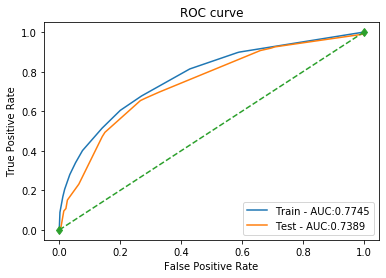

In [36]:
#DT
model_metrics(dt,X_train,X_test, y_train, y_test)

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=120, max_depth=9, min_samples_split=50,
                            min_samples_leaf=20, max_features = 9,oob_score=True, random_state=2018)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=9, max_features=9, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, n_estimators=120,
                       n_jobs=None, oob_score=True, random_state=2018,
                       verbose=0, warm_start=False)

[准确率] 训练集： 0.8156 测试集： 0.8040
[精准率] 训练集： 0.8881 测试集： 0.6761
[召回率] 训练集： 0.3187 测试集： 0.3673
[f1-score] 训练集： 0.4691 测试集： 0.4760
[auc值] 训练集： 0.9005 测试集： 0.7989


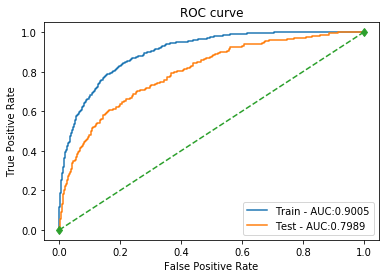

In [38]:
#RF
model_metrics(rf, X_train, X_test, y_train, y_test)

In [39]:
from xgboost.sklearn import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

[准确率] 训练集： 0.8499 测试集： 0.7704
[精准率] 训练集： 0.8647 测试集： 0.5223
[召回率] 训练集： 0.4893 测试集： 0.6142
[f1-score] 训练集： 0.6250 测试集： 0.5645
[auc值] 训练集： 0.9136 测试集： 0.7896


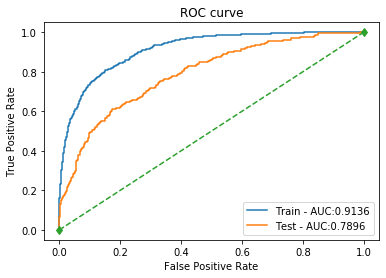

In [40]:
#XGB
model_metrics(xgb,X_train, X_test, y_train, y_test)

In [41]:
from sklearn import svm
svm_poly = svm.SVC(kernel = 'poly', probability=True).fit(X_train, y_train)
svm_rbf = svm.SVC(probability=True).fit(X_train, y_train)
svm_sigmoid = svm.SVC(kernel = 'sigmoid',probability=True).fit(X_train, y_train)

[准确率] 训练集： 0.7444 测试集： 0.7577
[精准率] 训练集： 0.0000 测试集： 0.0000
[召回率] 训练集： 0.0000 测试集： 0.0000
[f1-score] 训练集： 0.0000 测试集： 0.0000
[auc值] 训练集： 0.8029 测试集： 0.8010


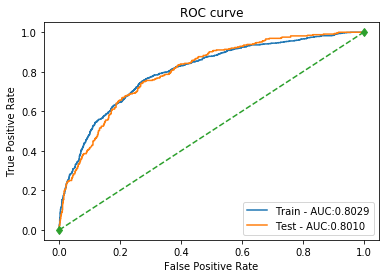

In [42]:
#SVC
model_metrics(svm_poly,X_train, X_test, y_train, y_test)

[准确率] 训练集： 0.7444 测试集： 0.7599
[精准率] 训练集： 0.0000 测试集： 1.0000
[召回率] 训练集： 0.0000 测试集： 0.0093
[f1-score] 训练集： 0.0000 测试集： 0.0183
[auc值] 训练集： 0.8012 测试集： 0.8104


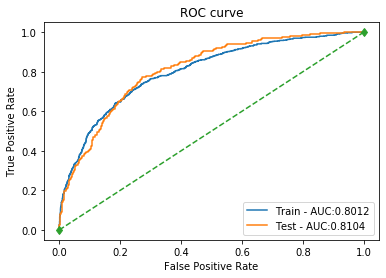

In [43]:
model_metrics(svm_rbf,X_train, X_test, y_train, y_test)

[准确率] 训练集： 0.7444 测试集： 0.7577
[精准率] 训练集： 0.0000 测试集： 0.0000
[召回率] 训练集： 0.0000 测试集： 0.0000
[f1-score] 训练集： 0.0000 测试集： 0.0000
[auc值] 训练集： 0.7991 测试集： 0.8092


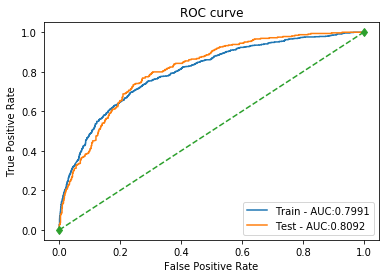

In [44]:
model_metrics(svm_sigmoid,X_train, X_test, y_train, y_test)